# Exercici 2
Fes les tasques de preprocessat i adequació del Dataset que disposem en el repositori de GitHub PRE-PROCESSING-DATA amb l'objectiu de preparar-lo i treballar-lo com a dataframe per a extreure'n informació.

Important:

El resultat final ha de ser un dataframe amb les variables de nom de la pel·lícula, any i genere. També és important quedar-se amb un sol gènere per a cada pel·lícula!

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#Carreguem l'arxiu per fer el nostre dataframe.
ds_pelis = pd.read_csv('/Users/jordi/Documents/IT Academy/Data Science/Sprint 4/M4T02-2/movies.dat.txt', sep='::', encoding="ISO-8859-1", header=None, engine='python')

#Extracció de títol i any.
ds_pelis[['Títol', 'Any']] = ds_pelis[1].str.extract(r'(.*?)\s\((\d+)\)')

#Extracció del primer gènere per pel·lícula
ds_pelis['Gènere'] = ds_pelis[2].str.split('|').str[0]

#Creem dataframe amb les variables requerides i eliminem l'ID per estar duplicat amb l'índex.
df_pelis = ds_pelis[[0, 'Títol', 'Any', 'Gènere']].drop(columns={0: 'ID'})
df_pelis.index += 1 #per arreglar l'índex i no començar amb 0.

df_pelis

,Títol,Any,Gènere
1,Toy Story,1995,Animation
2,Jumanji,1995,Adventure
3,Grumpier Old Men,1995,Comedy
4,Waiting to Exhale,1995,Comedy
5,Father of the Bride Part II,1995,Comedy
...,...,...,...
3879,Meet the Parents,2000,Comedy
3880,Requiem for a Dream,2000,Drama
3881,Tigerland,2000,Drama
3882,Two Family House,2000,Drama


In [2]:
df_pelis.info()
#Comprovem que cada columna té el format adequat.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 1 to 3883
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Títol   3882 non-null   object
 1   Any     3882 non-null   object
 2   Gènere  3883 non-null   object
dtypes: object(3)
memory usage: 91.1+ KB


Veiem que any està com a object, el passem a numèric.

In [3]:
df_pelis["Any"] = pd.to_numeric(df_pelis["Any"], errors="coerce")
df_pelis.info()
#Comprovem que ara estigui tot correcte.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 1 to 3883
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Títol   3882 non-null   object 
 1   Any     3882 non-null   float64
 2   Gènere  3883 non-null   object 
dtypes: float64(1), object(2)
memory usage: 91.1+ KB


# Exercici 3

Mostra la teva creativitat. Què creus rellevant mostrar del Dataset "movies.dat" de l'exercici anterior?

Fes una o dues representacions gràfiques i justifica la teva elecció.

In [4]:
df_genere = df_pelis.Gènere.value_counts()
df_genere

Drama          1176
Comedy         1024
Action          503
Horror          262
Adventure       155
Crime           131
Documentary     123
Thriller        101
Animation        90
Children's       89
Romance          50
Sci-Fi           46
Mystery          36
Western          33
Film-Noir        25
Musical          25
War              12
Fantasy           2
Name: Gènere, dtype: int64

Text(0, 0.5, 'Nombre de pel·lícules')

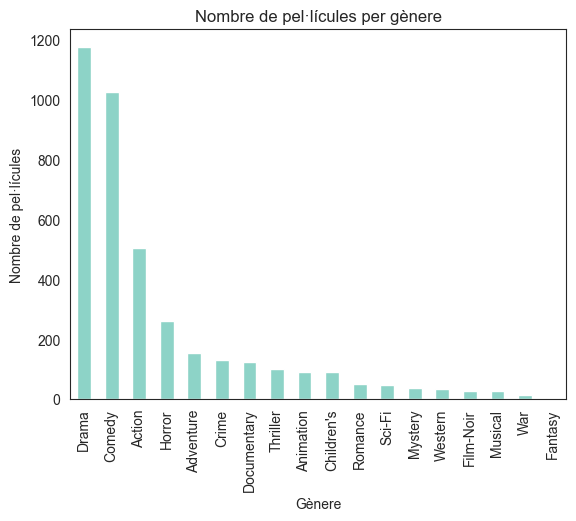

In [8]:
df_genere.plot.bar()
sns.set_style('white')
plt.title('Nombre de pel·lícules per gènere')
plt.xlabel('Gènere')
plt.ylabel('Nombre de pel·lícules')

He fet un gràfic de barres per fer una visualització senzilla del total de pel·lícules corresponents per gènere. Podem veure que les més comunes son: Drama, Comèdia, Acció i Por. Mentre que les menys comunes son: Cinema Negre, Musicals, Bèl·liques i de Fantasia.

In [6]:
df_anys = df_pelis.Any.value_counts()
df_anys

1996.0    345
1995.0    342
1998.0    337
1997.0    315
1999.0    283
         ... 
1923.0      3
1919.0      3
1922.0      2
1920.0      2
1921.0      1
Name: Any, Length: 81, dtype: int64

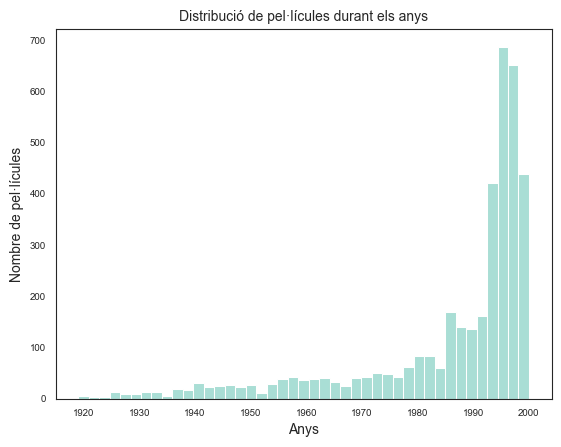

In [7]:
plt.figure
ax= sns.histplot(x='Any', data= df_pelis)
ax.set_title('Distribució de pel·lícules durant els anys', fontsize=10)
ax.set_xlabel('Anys',fontsize=10)
ax.set_ylabel('Nombre de pel·lícules', fontsize=10)
ax.tick_params(labelsize=7)
plt.show()

Una altra visualització interessant seria la proposada aquí dalt: Veure el nombre de pel·lícules produïdes i distrubuïdes al llarg dels anys. Podem apreciar un augment notable a la dècada dels 80, esclatant a la segona meitat dels 90 (on trobem la moda). No tenim dades més enllà del 2000 així que no podem comprovar si la baixada del 2000 es significativa a la següent dècada o no.